In [22]:
#importacion de librerias
import math
import datetime
import matplotlib.pyplot as plt
import numpy as np
import sunae

In [30]:
# Verificar si hay valores no finitos en los datos
def check_finite_values(azimuths, elevations):
    azimuths = np.array(azimuths)
    elevations = np.array(elevations)
    
    # Verificar si hay valores no finitos
    if not np.all(np.isfinite(azimuths)):
        print("Azimuths no finitos encontrados:", azimuths[~np.isfinite(azimuths)])
    if not np.all(np.isfinite(elevations)):
        print("Elevations no finitas encontradas:", elevations[~np.isfinite(elevations)])

    return azimuths, elevations


In [38]:
def plot_solar_trajectory(azimuths, elevations):
    """Grafica la trayectoria del Sol durante el día en una gráfica polar."""
    
    # Convertir los ángulos de azimut de grados a radianes para la gráfica polar
    azimuths_rad = [az * math.pi / 180 for az in azimuths]
    
    # Convertir a arrays numpy para mejor manipulación
    azimuths_rad = np.array(azimuths_rad)
    elevations = np.array(elevations)
    
    # Filtrar elevaciones negativas y azimuths correspondientes
    valid_indices = elevations > 0  # Consideramos solo elevaciones positivas
    azimuths_rad = azimuths_rad[valid_indices]
    elevations = elevations[valid_indices]
    
    if len(elevations) == 0:
        print("No hay datos válidos para graficar.")
        return
    
    # Crear una figura y un subgráfico polar
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, polar=True)

    # Usar un gradiente de color para la trayectoria del Sol (colores cálidos para mayor elevación)
    scatter = ax.scatter(azimuths_rad, elevations, c=elevations, cmap='plasma', s=50, edgecolor='black', label="Trayectoria del Sol")

    # Añadir una barra de color para indicar la elevación
    cbar = plt.colorbar(scatter, ax=ax, orientation='vertical')
    cbar.set_label('Elevación (grados)', fontsize=12)

    # Configurar la orientación y dirección de los ángulos en el gráfico polar
    ax.set_theta_zero_location('N')  # Establece el norte (0°) en la parte superior de la gráfica
    ax.set_theta_direction(-1)  # Configura la dirección de los ángulos en sentido horario

    # Configurar las etiquetas de elevación
    ax.set_rlabel_position(0)  # Posición de las etiquetas radiales en 0°
    ax.set_yticks(range(0, 91, 15))  # Añadir etiquetas de elevación cada 15 grados
    ax.set_ylim(0, 90)  # Limitar el rango de la elevación de 0 a 90 grados

    # Añadir líneas de referencia para el horizonte y elevación media
    ax.plot([0, 2 * math.pi], [0, 0], linestyle='--', color='gray', label="Horizonte")
    ax.plot([0, 2 * math.pi], [45, 45], linestyle=':', color='blue', label="Elevación Media")

    # Añadir etiquetas de hora en el borde
    for i, hour in enumerate(range(0, len(azimuths_rad))):
        if i < len(azimuths_rad) and i < len(elevations):  # Asegurarse de que el índice no esté fuera de rango
            ax.text(azimuths_rad[i], elevations[i] + 5, f'{hour}:00', fontsize=8, ha='center')

    # Añadir título y leyenda a la gráfica
    plt.title('Trayectoria del Sol durante el Día', fontsize=14)
    plt.legend(loc="upper right")

    # Mostrar la gráfica
    plt.show()


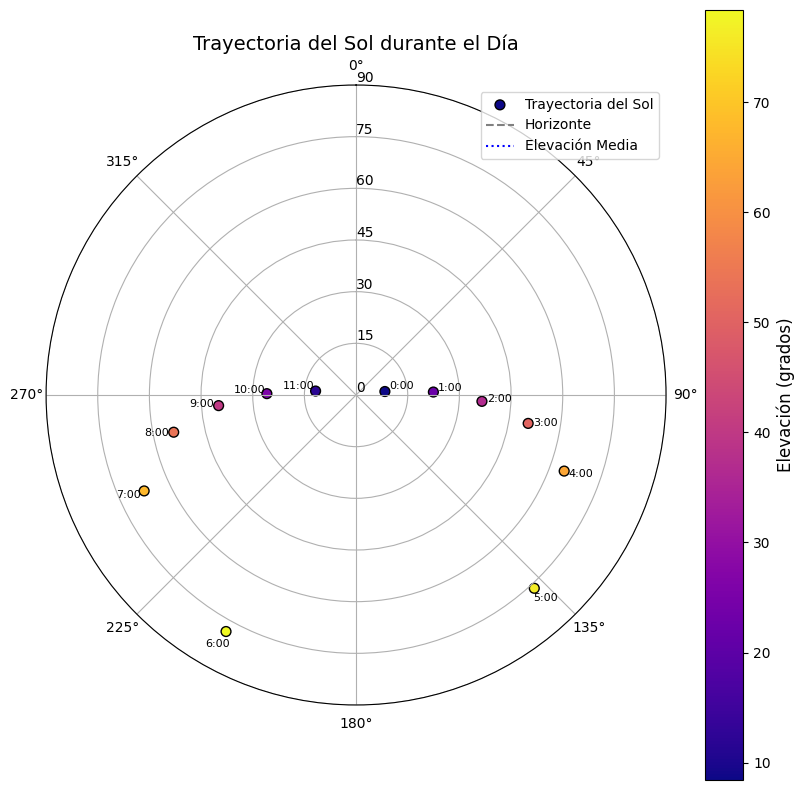

In [39]:
# Crear una instancia de la clase con la fecha y coordenadas
solar_position = sunae.SolarPosition(2024, 242, 19.4326, -99.1332)
    
# Calcular la trayectoria del sol a lo largo del día
azimuths, elevations = solar_position.calculate_daily_trajectory()

# Graficar la trayectoria del sol
plot_solar_trajectory(azimuths, elevations)

*APARTADO PARA CALCULAR LA POSICION ACTUAL*

In [16]:
# Obtener la fecha y hora actual
now = datetime.datetime.now(datetime.UTC)

# Convertir la fecha actual a formato necesario
year = now.year
day_of_year = now.timetuple().tm_yday
hour = now.hour + now.minute / 60 + now.second / 3600  # Hora en UTC decimal

# Latitud y longitud de Ciudad de México
lat = 19.4326  # Latitud de Ciudad de México
long = -99.1332  # Longitud de Ciudad de México

# Calcular la posición actual del Sol
az, el = sunae(year, day_of_year, hour, lat, long)
print(f'Azimut: {az} | Elevación: {el}')

Azimut: 102.61530519417973 | Elevación: 57.820795011500856


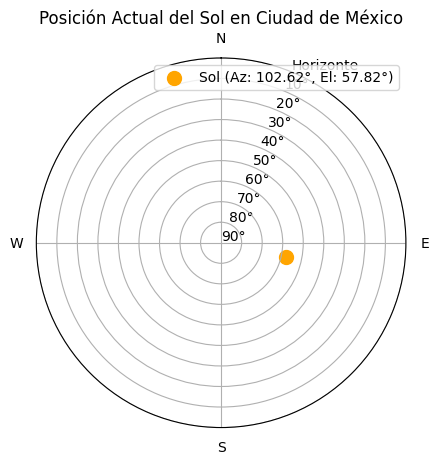

In [17]:
# Graficar la posición actual
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.set_theta_direction(-1)  # Direccion del azimut
ax.set_theta_offset(math.pi / 2.0)  # 0 grados apunta al norte

# Convertir ángulo a radianes para graficar en coordenadas polares
az_rad = math.radians(az)
el_rad = 90 - el  # Elevar el ángulo (para que 90° sea en el horizonte)

ax.scatter(az_rad, el_rad, c='orange', s=100, label=f'Sol (Az: {az:.2f}°, El: {el:.2f}°)')

# Configuración de la gráfica
ax.set_ylim(0, 90)
ax.set_yticks(range(0, 91, 10))
ax.set_yticklabels(['90°', '80°', '70°', '60°', '50°', '40°', '30°', '20°', '10°', 'Horizonte'])
ax.set_xticks([0, math.pi/2, math.pi, 3*math.pi/2])
ax.set_xticklabels(['N', 'E', 'S', 'W'])
ax.set_title('Posición Actual del Sol en Ciudad de México')

plt.legend()
plt.show()